# Data analysis and visualization in Jupyter Notebooks


## Use cases
- Experimenting with new ideas, testing new libraries/databases 
- Interactive code, data analysis and visualization development
- Interactive work on HPC clusters
- Sharing and explaining code to colleagues
- Learning from other notebooks
- Keeping track of interactive sessions, like a digital lab notebook
- Supplementary information with published articles
- Teaching (programming, experimental/theoretical science)
- Presentations with slides using [Reveal.js](https://github.com/damianavila/RISE)

## Exploring a library

- Tab completion and question marks can be used to explore a new library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# numpy.

In [ ]:
# numpy.sum?

## Widgets

Widgets add more interactivity to Notebooks, allowing one to visualize and control changes in data, parameters etc.

In [ ]:
from ipywidgets import interact

#### Use `interact` as a function

In [ ]:
def f(x, y, s):
    return (x, y, s)

interact(f, x=True, y=1.0, s="Hello");

#### Use `interact` as a decorator

In [ ]:
@interact(x=True, y=1.0, s="Hello")
def g(x, y, s):
    return (x, y, s)

## Interactive plots using widgets

In [ ]:
from ipywidgets import interact 
@interact
def plot(n=(1,6)):
    x = np.linspace(0,2*np.pi,100)
    y = np.sin(n*x)
    plt.plot(x,y, 'r-')
    plt.show()

## Magics

Magics are a simple command language which significantly extend the power of Jupyter 

Two kinds of magics:

  - **Line magics**: commands prepended by one % character and whose arguments only extend to the end of the current line.
  - **Cell magics**: use two percent characters as a marker (%%), receive as argument the whole cell (must be used as the first line in a cell)

Other features:
  - Use `%lsmagic` magic to list all available line and cell magics
  - Question mark shows help: `%cd?`
  - Additional magics can be created, see below for example

In [ ]:
%lsmagic

You can capture the output of line magic (and shell) commands

In [ ]:
ls_out = %ls
ls_out

In [ ]:
%sx?

In [ ]:
ls_out = %sx ls
ls_out

### %timeit
- Timing execution
- Both Line and Cell level

In [ ]:
%timeit import time ; time.sleep(1)

In [ ]:
%%timeit 
a = np.random.rand(100, 100)
np.linalg.eigvals(a)

### %%writefile
Writes the cell contents as a named file

In [ ]:
%%writefile foo.py
print('Hello world')

### %run 
 - Executes python code from .py files 
 - Can also execute other jupyter notebooks

In [ ]:
%run foo

### %load
 - Loads code directly into cell. File either from local disk or from the internet
 - After uncommenting the code below and executing, it will replace the content of cell with contents of file.

In [ ]:
# %load https://matplotlib.org/_downloads/annotate_transform.py

### %debug
Activate interactive debugger

Let's try using `%debug` to hunt down a bug. We first execute the cell, and then run the `%debug` magic.

In [ ]:
def calc_reciprocal(x):
    inv_x = []
    for i in x:
        inv_x.append(1.0 / i)
    return inv_x

x = [1,5,2,0,5]
y = calc_reciprocal(x)

Run the debugger post-mortem. If an exception has just occurred, the debug magic lets you inspect its stack frames interactively

In [ ]:
%debug

**Don't forget to exit the debugger by typing `q` and `Enter`!**  
If you don't, the background process will not be ready for your next command.

### %prun
 - Python code profiler
 - Cell and Line magic

In [ ]:
%%prun 
a = np.random.rand(1000, 1000)
np.linalg.eigvals(a)

## Exercises

> Now open the [exercises](exercises.ipynb) notebook and start working on the exercises!

## Mixing in other languages (assuming they're installed)

The `%%script` magic is like the #! (shebang) line of a Unix script,
specifying a program (bash, perl, ruby, etc.) with which to run.  
But one can also directly use these:
- %%ruby
- %%perl
- %%bash
- %%html
- %%latex
- %%R

Why would you want to mix programming languages in the same notebook?
 - leverage strengths from different languages
 - using code from colleagues
 - a fantastic library exists in another language than your favorite one

In [ ]:
%%ruby
puts 'Hi, this is ruby.'

In [ ]:
%%script ruby
puts 'Hi, this is also ruby.'

In [ ]:
%%perl
print "Hello, this is perl\n";

In [ ]:
%%bash
echo "Hullo, I'm bash"

In [ ]:
%%html
<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>

In [ ]:
%%latex
\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

### R

The R world already has a powerful IDE, RStudio, where one can annotate code using Markdown and export to HTML.  
A key difference between RStudio and Jupyter is that in Jupyter one can modify and rerun individual cells, without having to rerun everything.

In [ ]:
# first we need to install the necessary packages
#!conda install -c r r-essentials 
#!conda install -y rpy2

To run R from the Python kernel we need to load the rpy2 IPython extension

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
myString <- "Hello, this is R"
print ( myString)

[1] "Hello, this is R"


Inline plotting in R is straightforward 

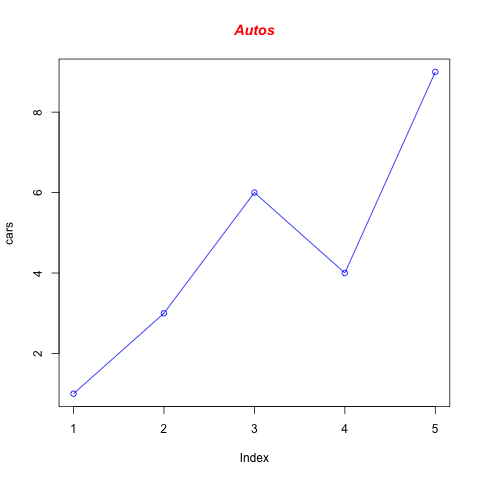

In [6]:
%%R 
# Define the cars vector with 5 values
cars <- c(1, 3, 6, 4, 9)

# Graph cars using blue points overlayed by a line 
plot(cars, type="o", col="blue")

# Create a title with a red, bold/italic font
title(main="Autos", col.main="red", font.main=4)

Data in R cells is of course persistent

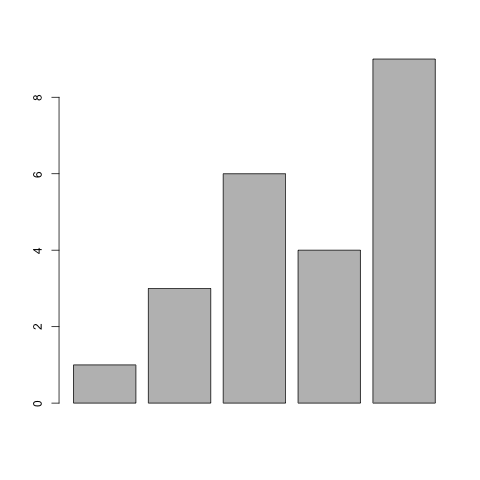

In [7]:
%%R 
barplot(cars)

In [ ]:
%%R -i df -w 6 -h 4 --units cm -r 200
# the first line says 'import df and make default figure size 5 by 5 inches 
# with resolution 200. You can change the units to px, cm, etc. as you wish.
library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

## Sharing notebooks

- You can enter a URL, GitHub repo or username, or GIST ID in [`nbviewer`](https://nbviewer.jupyter.org/) and view a rendered Jupyter notebook
    - try entering just "coderefinery" and see if you can find this current notebook
- Read the Docs can render Jupyter Notebooks via the [nbsphinx package](https://nbsphinx.readthedocs.io/)
- [Binder](https://mybinder.org/) creates live notebooks based on a GitHub repository
- [CoCalc](https://cocalc.com/) (formerly SageMathCloud) allows collaborative editing of notebooks in the cloud 
- Google's [colaboratory](https://colab.research.google.com/) lets you work on notebooks in the cloud, and you can [read and write to notebook files on Drive](https://colab.research.google.com/notebooks/io.ipynb)
- [Microsoft Azure Notebooks](https://notebooks.azure.com/) also offers free notebooks in the cloud
- [JupyterLab](https://github.com/jupyterlab/jupyterlab) supports sharing and collaborative editing of notebooks via Google Drive 
- [Notedown](https://github.com/aaren/notedown), [Jupinx](https://github.com/QuantEcon/sphinxcontrib-jupyter) and [DocOnce](https://github.com/hplgit/doconce) can take Markdown or Sphinx files and generate Jupyter Notebooks
- The `jupyter nbconvert` tool can convert a (`.ipynb`) notebook file to:
    - python code (`.py` file) 
    - an HTML file
    - a LaTeX file
    - a PDF file
    - a slide-show in the browser

Note: the Google, Microsoft and CoCalc platforms are free but have paid subscriptions for faster access to cloud resources

## Key points

- Magics give you extra powers
- Widgets provide more interactivity
- [Support for many programming languages](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)
    - and different languages can be mixed
- Platforms exist to share and collaborate on with colleagues
